# Explanatory Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)



In [3]:

from data_preprocessor import DataPreprocessor 
# Configure logging
from logger_script import SetupLogger
 

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

In [4]:
# Initialize the DataPreprocessor with the logger and the path to the dataset
data_preprocessor = DataPreprocessor(filepath='../data/cs-training.csv', logger=logger)

In [5]:
# Load the dataset
data_df = data_preprocessor.load_dataset()

In [6]:
# First 5 rows of the dataset
data_df.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
# Dataset Information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [8]:
# Check for missing values in the dataset
missing_values = data_df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"There are {missing_values.sum()} missing values in the dataset.")

Missing Values in Each Column:
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64
There are 33655 missing values in the dataset.


In [9]:

# Check for duplicate rows in the DataFrame
duplicate_count = data_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count:
    data_df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [10]:
# Remove rows with any null values
data_df_cleaned = data_df.dropna()
# Drop the 'Unnamed: 0' column
data_df_cleaned.drop(columns=['Unnamed: 0'], inplace=True)
# Verify that there are no more null values
print("Missing Values in Each Column After Cleaning:")
print(data_df_cleaned.isnull().sum())

Missing Values in Each Column After Cleaning:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


/tmp/ipykernel_110489/3008236047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_cleaned.drop(columns=['Unnamed: 0'], inplace=True)


In [11]:
# Summary Statistics of numerical features
# data_df.describe(include='number')
data_df_cleaned.describe(include='number')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [12]:
from data_visualizer import DataVisualizer
print(data_df_cleaned.columns.tolist())


['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


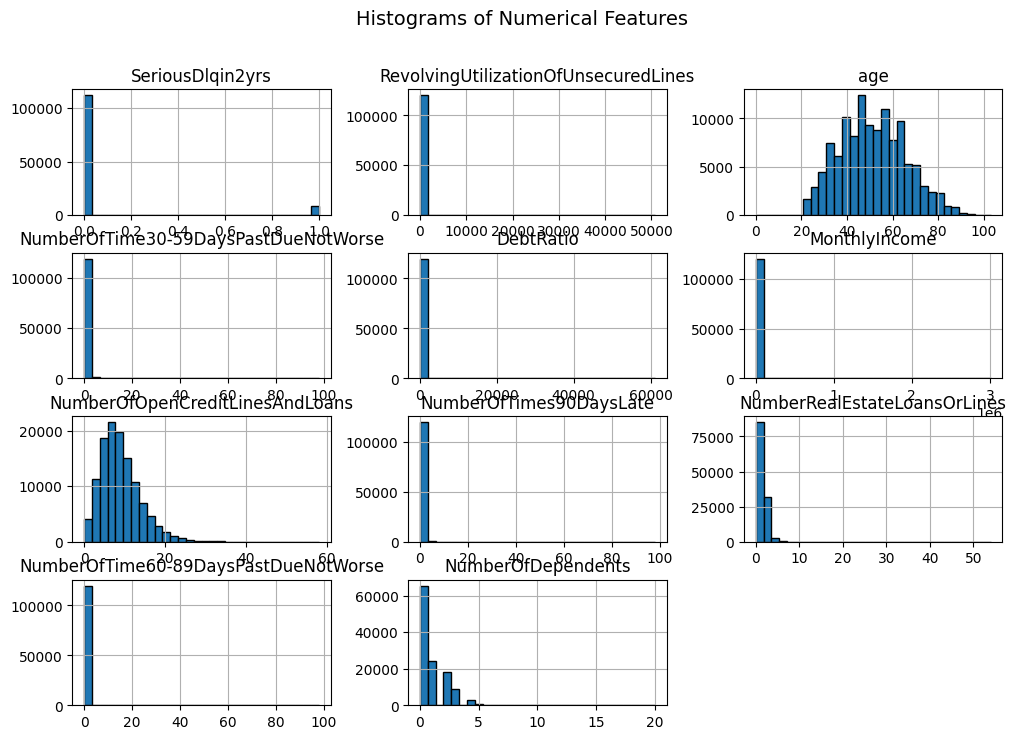

In [13]:

# Define numerical features
numerical_features =['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

# Define categorical features
categorical_features = ['SeriousDlqin2yrs']

numerics = data_df_cleaned[[col for col in data_df_cleaned.columns if col not in categorical_features]]
# Create instance of the DataVisualizer(df, target_col)
visualizer = DataVisualizer(data_df_cleaned, numerical_features, categorical_features, 'class', logger)



visualizer.plot_histograms()



/home/abel/CODE/AAiT/AI/Advanced-XAI-Project-Credit-Score-Modeling/scripts/data_visualizer.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data_df, x=feature, palette="coolwarm")


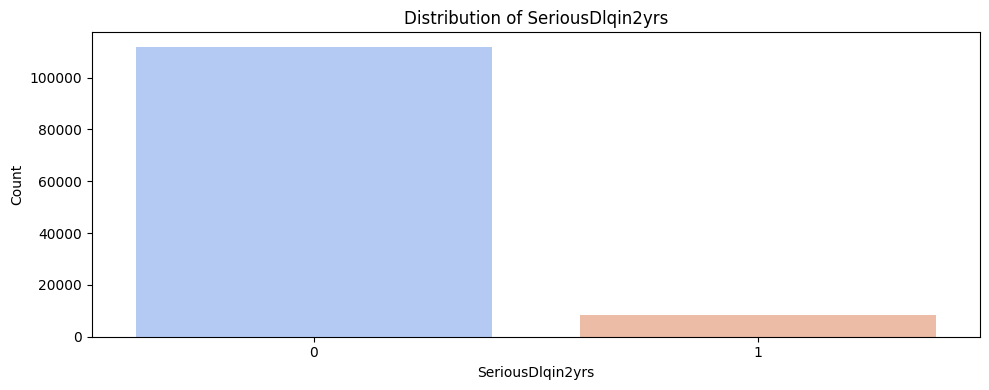

In [14]:
# Visualize the distribution
visualizer.plot_categorical_counts()

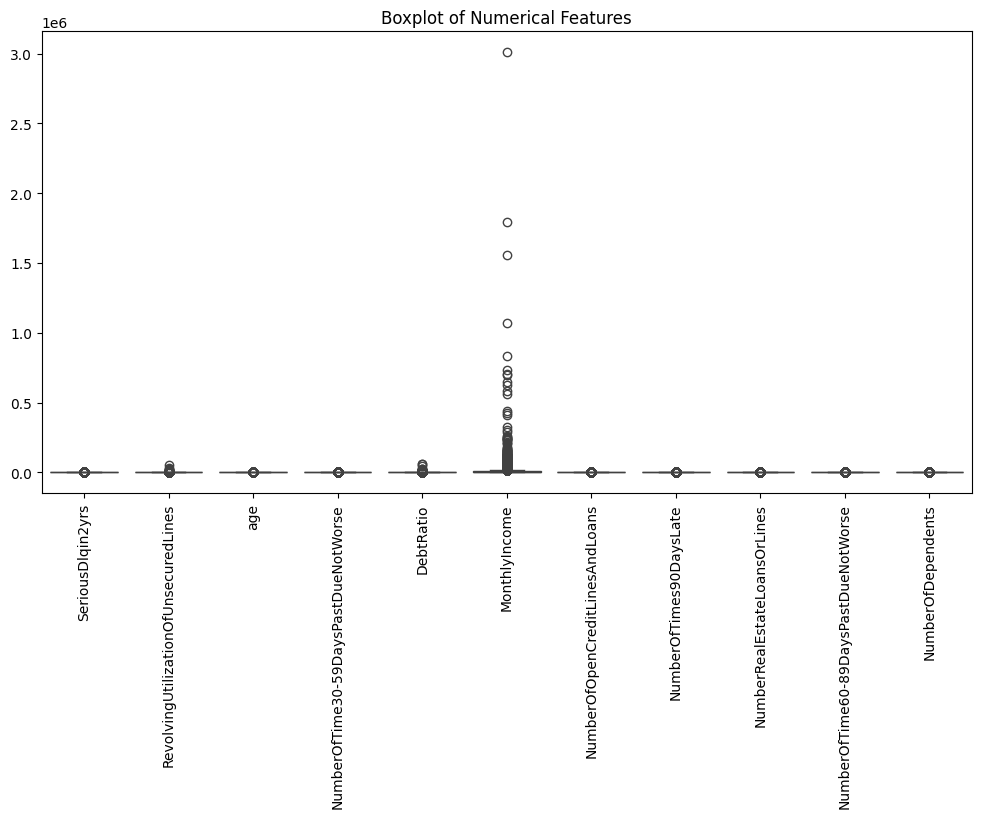

In [15]:
# visualizer.box_plot(numerical_features)
# Create box plots for numerical features
# visualizer.box_plot(data_df[numerical_features])
# Create box plots for numerical features
visualizer.plot_boxplots()

# Feature Distribution Patterns:

### a) RevolvingUtilizationOfUnsecuredLines:

Many outliers above the upper quartile
Right-skewed distribution

### b) Age:

Relatively normal distribution
Few outliers
Reasonable range of values
### c) DebtRatio:

Extreme outliers present
Highly right-skewed
Needs robust scaling or transformation
### d) MonthlyIncome:

Significant outliers on the high end
Right-skewed distribution

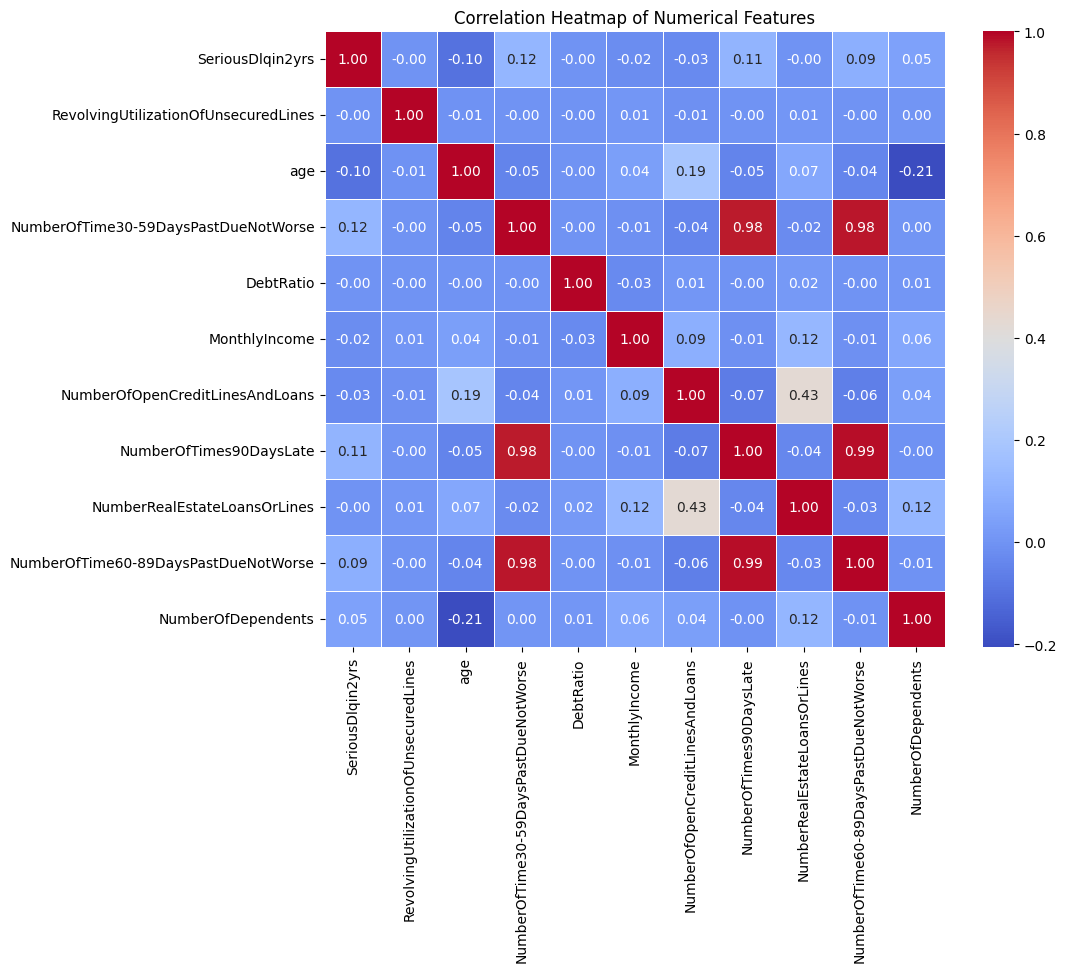

In [16]:
visualizer.plot_correlation_heatmap()

/tmp/ipykernel_110489/2481015155.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/abel/CODE/AAiT/AI/Advanced-XAI-Project-Credit-Score-Modeling/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


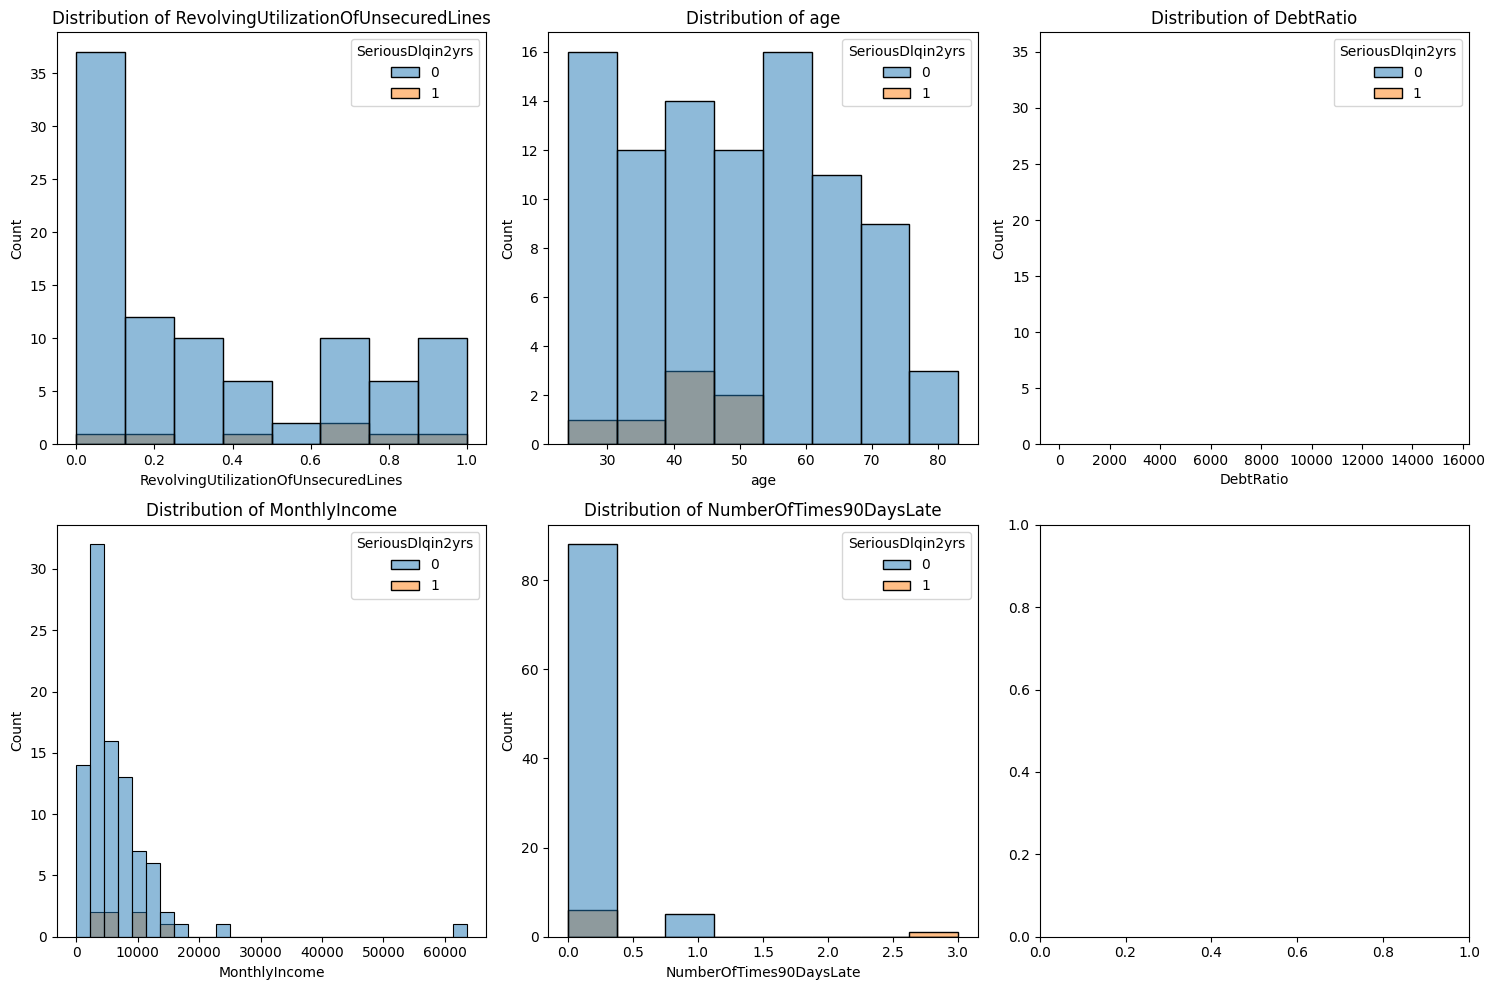

In [18]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
key_features = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfTimes90DaysLate'
]

for idx, feature in enumerate(key_features):
    sns.histplot(data=data_df_cleaned[:100], x=feature, hue='SeriousDlqin2yrs', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
     

In [ ]:
# Save the processed datase to the csv for modeling
# processed_data.to_csv('../data/processed__data.csv')
data_df_cleaned.to_csv('../data/processed__data.csv')